## LSTM

In [38]:
#Vamos ver como funcionam as LSTM
#Para estudar as Redes Long Short Term Memory vamos precisar de séries temporais

from datapackage import Package # a biblioteca datapackage oferece uma coleção de dados que podem ser baixados diretamente da internet

package = Package('https://datahub.io/core/global-temp/datapackage.json') # vamos carregar a base com as médias de temperatura global ao longo dos últimos anos

for resource in package.resources: # de todos os recursos disponíveis no pacote autor, informações, etc
    if resource.descriptor['datahub']['type'] == 'derived/csv': #vamos selecionar o arquivo CSV para carregá-lo
        data = resource.read()

data_gcag = data[0:len(data):2][::-1]

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler # minMaxScaler serve para "escalar" (normalizar) os valores em um intervalo

Y = np.zeros(shape=(len(data_gcag), 1), dtype=np.float32)

for i, y in enumerate(data_gcag):
    Y[i - 1, 0] = y[2]

mmscaler = MinMaxScaler((-1.0, 1.0)) # define o intervalo entre -1 e 1
Y = mmscaler.fit_transform(Y)  #vamos transformar os dados para escala -1 e 1

In [40]:
nb_samples = 1600      #são 1600 linhas
nb_test_samples = 200  #estamos separando as últimas 200 para teste
sequence_length = 20   #e criando janelas com 20 pontos

#define os datasets com a janela de tempo de tamanho "sequence_length"
X_ts = np.zeros(shape=(nb_samples - sequence_length, sequence_length, 1), dtype=np.float32)  #cria a array x com zeros para o tamanho fornecido e 3 dimensoes (tamanho - sequence_length, sequence_length e 1)
Y_ts = np.zeros(shape=(nb_samples - sequence_length, 1), dtype=np.float32) #cria a array y com zeros para o tamanho fornecido e 2 dimensoes (tamanho - sequence_length e 1)

#preenche as arrays
for i in range(0, nb_samples - sequence_length):
    X_ts[i] = Y[i:i + sequence_length] # aqui, adicionando as janelas para cada posição
    Y_ts[i] = Y[i + sequence_length]

#separa em dataset p/ treinamento e teste
X_ts_train = X_ts[0:nb_samples - nb_test_samples, :]
Y_ts_train = Y_ts[0:nb_samples - nb_test_samples]

X_ts_test = X_ts[nb_samples - nb_test_samples:, :]
Y_ts_test = Y_ts[nb_samples - nb_test_samples:]

In [95]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation,Flatten

model = Sequential() # vamos criar um modelo sequencial p/ a rede neural 

#Quando uma LSTM é seguida por outra camada LSTM, a primeira deve ter o parâmetro return_sequences=True. 
#model.add(LSTM(8, stateful=True, return_sequences=True, batch_input_shape=(20, sequence_length, 1)))

model.add(LSTM(8, stateful=True, batch_input_shape=(20, sequence_length, 1)))  #define um bloco LSTM com 8 unidades e com 20 pontos de entrada
model.add(Flatten()) # a saída é transformada em um único vetor de entrada
model.add(Dense(1))  # para um único perceptron
model.add(Activation('linear')) #com ativação linear

In [96]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001), #treinada com taxa de aprendizado 0.001
              loss='mse', # e função de perda/métrica MSE
              metrics=['mse'])

In [97]:
# vamos executar o treinamento

history = model.fit(X_ts_train, Y_ts_train,
          batch_size=20, #para lotes de 20 em 20
          epochs=100, # por 100 épocas
          shuffle=False, #sem embaralhar os dados de treinamento a cada época
          validation_data=(X_ts_test, Y_ts_test)) #fazendo a validação com o conjunto separado para testes


Epoch 1/100
70/70 [==============================] - 15s 180ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 2/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0161 

70/70 [==============================] - 0s 7ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 64/100
70/70 [==============================] - 1s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 65/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 66/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 67/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 68/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 69/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 70/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


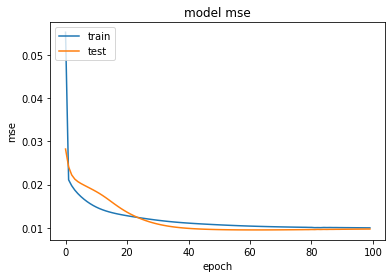

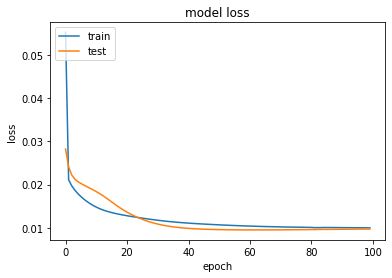

In [98]:
import matplotlib.pyplot as plt

# lista todos os dados contidos no histórico de treinamento
#print(history.history.keys())

# plotamos o erro calculado a partir do histórico
plt.plot(history.history['mse'])  # erro médio quadrático (treinamento)
plt.plot(history.history['val_mse']) # erro médio quadrático (teste)
plt.title('MSE do Modelo')
plt.ylabel('mse')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()




70/70 [==============================] - 1s 3ms/step


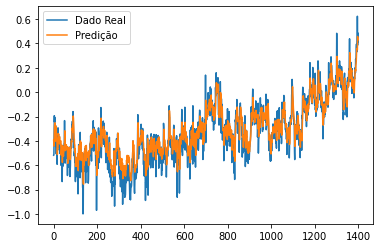

In [99]:
# Agora, vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de treinamento)
plt.plot(Y_ts_train) #plota dados originais
plt.plot(model.predict(X_ts_train, batch_size=20)) #plota dados resultantes
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 3ms/step


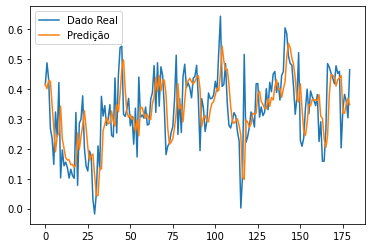

In [100]:
# e vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de validação)
plt.plot(Y_ts_test)
plt.plot(model.predict(X_ts_test, batch_size=20))
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

## Autoencoder

### Standard Autoencoder

In [3]:
#nestes exemplos de autoencoder, vamos usar imagens que serao analisadas, codificadas e decodificadas
#para isto, usamos a biblioteca de imagens PIL

import numpy as np
from PIL import Image #biblioteca de imagens

from keras.datasets import fashion_mnist #dataset acadêmico clássico MNIST com imagens de roupas

(X_train, _), (_, _) = fashion_mnist.load_data() # o dataset já vem com separações recomendadas para treinamento e teste

#definimos os parâmetros de treinamento como:
nb_samples = 1000 # número de amostras
nb_epochs = 400 # número de epocas
batch_size = 200 # tamanho dos batchs de treinamento
code_length = 256 # tamanho do código gerado pela codificação

X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0  # aqui, transformamos os valores da imagem que inicialmente seguem intervalo 0-255 p/ intervalo 0-1
#assim, podemos usar na rede sem distorções

width = X_train.shape[1] #largura das amostras
height = X_train.shape[2] #altura das amostras

In [189]:
#agora, vamos configurar manualmente nossa rede 
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph() # criamos um grafo vazio onde...

with graph.as_default():
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))  #recebemos imagens com (width, height, 1) 1 unico canal de cores
    
    r_input_images = tf.image.resize_images(input_images, (32, 32)) # que são redimensionadas para 32 x 32
    
    # Encoder
    conv_0 = Conv2D(filters=32, #camada convolucional de 32 filtros
                      kernel_size=(3, 3), #com kernel 3x3
                      strides=(2, 2), # e stride 2
                      activation=tf.nn.relu, #usando ativação relu
                      padding='same')(r_input_images) # e same padding
    
    conv_1 = Conv2D(filters=64, # entrega para camada convolucional de 64
                      kernel_size=(3, 3), #com mesmos parâmetros
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128, #e em seguida de 128
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
    
    #o aumento dimensional é criado para definir as regiões do espaço vetorial e entregar as variáveis de codificação com tamanho de code_length

    # Code layer
    code_input = Flatten()(conv_2) #para encerrar a rede decoder - uma rede MLP classica
    
    code_layer = Dense(units=code_length,
                         activation=tf.nn.sigmoid)(code_input) #com ativação sigmoide
    
    #durante o treinamento as redes são ligadas uma na outra
    #de modo que a rede decoder aprende a decodificar o resultado codificado da rede
    #encoder

    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, 16, 16, 1)) #recebe os 256 valores definidos pelo code_length
    
    convt_0 = Conv2DTranspose(filters=128, #faz o processo reverso para chegarmos na imagem de 32x32
                                 kernel_size=(3, 3),
                                 strides=(2, 2),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    loss = tf.nn.l2_loss(convt_3 - r_input_images) #define a função de perda utilizando norm l2
    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss) #e realiza o treinamento com tx de aprendizado de 0.001

In [191]:
#defida a rede, vamos passar pela etapa de treinamento
#neste exemplo o processo é manual

import numpy as np 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.InteractiveSession(graph=graph) #vamos criar uma sessão para o grafo definido
tf.global_variables_initializer().run()

for e in range(nb_epochs): #  para cada iteração (época)
    np.random.shuffle(X_train) # embaralha o conjunto de treinamento
    
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size): #realiza o treinamento de acordo com os batchs
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        
        _, n_loss = session.run([training_step, loss],  #calcula o treino e o erro
                                feed_dict={
                                    input_images: X
                                })
        total_loss += n_loss #e soma o erro para cada amostra treinada
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 64295.1083984375
Epoch 2) Total loss: 51752.0009765625
Epoch 3) Total loss: 39843.7431640625
Epoch 4) Total loss: 33155.103515625
Epoch 5) Total loss: 27853.87353515625
Epoch 6) Total loss: 24710.5244140625
Epoch 7) Total loss: 23183.787109375
Epoch 8) Total loss: 21983.7578125
Epoch 9) Total loss: 21211.9150390625
Epoch 10) Total loss: 20439.03369140625
Epoch 11) Total loss: 19644.97314453125
Epoch 12) Total loss: 19190.537109375
Epoch 13) Total loss: 18438.12353515625
Epoch 14) Total loss: 18062.25830078125
Epoch 15) Total loss: 17476.93310546875
Epoch 16) Total loss: 16359.732177734375
Epoch 17) Total loss: 15654.0302734375
Epoch 18) Total loss: 14311.017578125
Epoch 19) Total loss: 12922.913818359375
Epoch 20) Total loss: 11595.836181640625
Epoch 21) Total loss: 10193.550048828125
Epoch 22) Total loss: 8945.36083984375
Epoch 23) Total loss: 8041.878173828125
Epoch 24) Total loss: 7193.478759765625
Epoch 25) Total loss: 6656.6912841796875
Epoch 26) Total loss: 6

Epoch 203) Total loss: 820.1187438964844
Epoch 204) Total loss: 822.1236419677734
Epoch 205) Total loss: 837.7859039306641
Epoch 206) Total loss: 895.2823944091797
Epoch 207) Total loss: 949.7849731445312
Epoch 208) Total loss: 835.1707000732422
Epoch 209) Total loss: 950.5208740234375
Epoch 210) Total loss: 843.6034240722656
Epoch 211) Total loss: 858.0288696289062
Epoch 212) Total loss: 828.9719543457031
Epoch 213) Total loss: 839.8622741699219
Epoch 214) Total loss: 876.86083984375
Epoch 215) Total loss: 808.6559906005859
Epoch 216) Total loss: 827.1439056396484
Epoch 217) Total loss: 815.9294281005859
Epoch 218) Total loss: 803.5347747802734
Epoch 219) Total loss: 775.7478942871094
Epoch 220) Total loss: 804.1312408447266
Epoch 221) Total loss: 862.3652038574219
Epoch 222) Total loss: 959.0742492675781
Epoch 223) Total loss: 994.7584991455078
Epoch 224) Total loss: 842.5361328125
Epoch 225) Total loss: 877.1988067626953
Epoch 226) Total loss: 854.4855804443359


KeyboardInterrupt: 

In [192]:
import numpy as np

codes = session.run([code_layer], 
                    feed_dict={
                        input_images: np.expand_dims(X_train, axis=3),
                    })[0]

print(np.mean(codes)) # verificação do erro/acurácia de treinamento

0.5324642


In [193]:
import numpy as np

Xs = np.reshape(X_train[0:10], (10, width, height, 1)) # seleciona as 10 primeiras imagens do conjunto de treinamento

Ys = session.run([convt_3], 
                 feed_dict={
                     input_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0) #transforma as saídas da rede em imagens (muda escala de 0-1 para 0-255)

In [231]:
#exibe a saída com as 10 imagens decodificadas
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### denoising autoencoder

In [219]:
#Vamos fazer o mesmo exemplo, agora com denoising autoencoders
#a configuração da rede é a mesma
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph() # criamos um grafo vazio onde...

with graph.as_default():
    input_noisy_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))#recebemos imagens e adicionamos ruído com (width, height, 1) 1 unico canal de cores
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))#recebemos imagens com (width, height, 1) 1 unico canal de cores
  
    # Encoder
    conv_0 = Conv2D(filters=32, #camada convolucional de 32 filtros
                      kernel_size=(3, 3), #com kernel 3x3
                      strides=(2, 2), # e stride 2
                      activation=tf.nn.relu, #usando ativação relu
                      padding='same')(r_input_images) # e same padding
    
    conv_1 = Conv2D(filters=64, # entrega para camada convolucional de 64
                      kernel_size=(3, 3), #com mesmos parâmetros
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128, #e em seguida de 128
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
        
    #o aumento dimensional é criado para definir as regiões do espaço vetorial e entregar as variáveis de codificação com tamanho de code_length

    # Code layer
    code_input = Flatten()(conv_2)
    
    code_layer = Dense(units=width * height,
                         activation=tf.nn.sigmoid)(code_input)    #com ativação sigmoide

    #durante o treinamento as redes são ligadas uma na outra
    #de modo que a rede decoder aprende a decodificar o resultado codificado da rede
    #encoder

    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, width, height, 1)) #recebe os 256 valores definidos pelo code_length
    
    convt_0 = Conv2DTranspose(filters=128,#faz o processo reverso para chegarmos na imagem de 32x32
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    loss = tf.nn.l2_loss(convt_3 - input_images) #define a função de perda utilizando norm l2
    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss) #e realiza o treinamento com tx de aprendizado de 0.001

In [220]:
#defida a rede, vamos passar pela etapa de treinamento
#neste exemplo o processo é manual

import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


session = tf.InteractiveSession(graph=graph) #vamos criar uma sessão para o grafo definido
tf.global_variables_initializer().run()

for e in range(nb_epochs): #  para cada iteração (época)
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):#realiza o treinamento de acordo com os batchs
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        Xn = np.clip(X + np.random.normal(0.0, 0.2, size=(batch_size, width, height, 1)), 0.0, 1.0) # e adiciona um ruído aleatório - ou seja, sorteia pontos que devem ter valores alterados
        #dessa forma, estamos "sujando" propositalmente os dados para simular o ruído do canal enquanto fazemos o aprendizado

        _, n_loss = session.run([training_step, loss],  #calcula o treino e o erro
                                feed_dict={
                                    input_images: X,
                                    input_noisy_images: Xn
                                })
        total_loss += n_loss #e soma o erro para cada amostra treinada
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 45172.6357421875
Epoch 2) Total loss: 32639.70751953125


KeyboardInterrupt: 

In [246]:
import numpy as np


#Generate Noisy dataset
X = np.zeros((len(X_train), width, height, 1), dtype=np.float32)
X[:, :, :, 0] = X_train
Xn = np.clip(X + np.random.normal(0.0, 0.2, size=(len(X), width, height, 1)), 0.0, 1.0) #novamente criamos ruídos no nas imagens para verificar a acurácia do teste
        

codes = session.run([code_layer], 
                    feed_dict={
                        input_noisy_images: Xn
                    })[0]

print(np.mean(codes)) # verificação do erro/acurácia de treinamento

0.6577547


In [247]:
import numpy as np

Xs = np.reshape(Xn[0:10], (10, width, height, 1)) # seleciona as 10 primeiras imagens do conjunto de treinamento

Ys = session.run([convt_3], 
                 feed_dict={
                     input_noisy_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0) #transforma as saídas da rede em imagens (muda escala de 0-1 para 0-255)

In [248]:
#exibe a saída com as 10 imagens decodificadas
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### Sparse autoencoder

In [249]:
#nestes exemplos de autoencoder, vamos usar imagens que serao analisadas, codificadas e decodificadas
#para isto, usamos a biblioteca de imagens PIL

import numpy as np
from PIL import Image #biblioteca de imagens

from keras.datasets import fashion_mnist #dataset acadêmico clássico MNIST com imagens de roupas

(X_train, _), (_, _) = fashion_mnist.load_data() # o dataset já vem com separações recomendadas para treinamento e teste

#definimos os parâmetros de treinamento como:
nb_samples = 1000 # número de amostras
nb_epochs = 400 # número de epocas
batch_size = 200 # tamanho dos batchs de treinamento
code_length = 256 # tamanho do código gerado pela codificação

X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0  # aqui, transformamos os valores da imagem que inicialmente seguem intervalo 0-255 p/ intervalo 0-1
#assim, podemos usar na rede sem distorções

width = X_train.shape[1] #largura das amostras
height = X_train.shape[2] #altura das amostras

In [251]:
#agora, vamos configurar manualmente nossa rede 
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph() # criamos um grafo vazio onde...

with graph.as_default():
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))  #recebemos imagens com (width, height, 1) 1 unico canal de cores
    
    r_input_images = tf.image.resize_images(input_images, (32, 32)) # que são redimensionadas para 32 x 32
    
    # Encoder
    conv_0 = Conv2D(filters=32, #camada convolucional de 32 filtros
                      kernel_size=(3, 3), #com kernel 3x3
                      strides=(2, 2), # e stride 2
                      activation=tf.nn.relu, #usando ativação relu
                      padding='same')(r_input_images) # e same padding

    
    conv_1 = Conv2D(filters=64, # entrega para camada convolucional de 64
                      kernel_size=(3, 3), #com mesmos parâmetros
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128, #e em seguida de 128
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
    # Code layer
    code_input = Flatten()(conv_2) #para encerrar a rede decoder - uma rede MLP classica
    
    code_layer = Dense(units=code_length,
                         activation=tf.nn.sigmoid)(code_input) #com ativação sigmoide
    
    #durante o treinamento as redes são ligadas uma na outra
    #de modo que a rede decoder aprende a decodificar o resultado codificado da rede
    #encoder
    
    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, 16, 16, 1)) #recebe os 256 valores definidos pelo code_length
    
    convt_0 = Conv2DTranspose(filters=128, #faz o processo reverso para chegarmos na imagem de 32x32
                                 kernel_size=(3, 3),
                                 strides=(2, 2),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    sparsity_constraint = tf.reduce_sum(0.001 * tf.norm(code_layer, ord=1, axis=1)) #calcula o quão esparsa é modelo
    loss = tf.nn.l2_loss(convt_3 - r_input_images) + sparsity_constraint #define a função de perda utilizando norm l2

    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss) #e realiza o treinamento com tx de aprendizado de 0.001

In [252]:
#defida a rede, vamos passar pela etapa de treinamento
#neste exemplo o processo é manual

import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.InteractiveSession(graph=graph) #vamos criar uma sessão para o grafo definido
tf.global_variables_initializer().run()

for e in range(nb_epochs):#  para cada iteração (época)
    np.random.shuffle(X_train)# embaralha o conjunto de treinamento
    
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):#realiza o treinamento de acordo com os batchs
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        
        _, n_loss = session.run([training_step, loss], 
                                feed_dict={
                                    input_images: X
                                })
        total_loss += n_loss#e soma o erro para cada amostra treinada
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 60323.5048828125
Epoch 2) Total loss: 39640.9921875
Epoch 3) Total loss: 36335.1806640625


KeyboardInterrupt: 

In [253]:
import numpy as np

codes = session.run([code_layer], 
                    feed_dict={
                        input_images: np.expand_dims(X_train, axis=3),
                    })[0]

print(np.mean(codes)) # verificação do erro/acurácia de treinamento

0.61094445


In [254]:
import numpy as np

Xs = np.reshape(X_train[0:10], (10, width, height, 1))# seleciona as 10 primeiras imagens do conjunto de treinamento

Ys = session.run([convt_3], 
                 feed_dict={
                     input_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0) #transforma as saídas da rede em imagens (muda escala de 0-1 para 0-255)

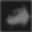

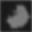

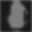

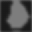

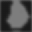

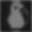

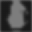

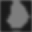

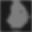

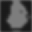

In [255]:
#exibe a saída com as 10 imagens decodificadas
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### GAN

In [1]:
import numpy as np

from keras.datasets import fashion_mnist #dataset acadêmico clássico MNIST com imagens de roupas

nb_samples = 5000

(X_train, _), (_, _) = fashion_mnist.load_data() # o dataset já vem com separações recomendadas para treinamento e teste
X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0 # aqui, transformamos os valores da imagem que inicialmente seguem intervalo 0-255 p/ intervalo 0-1
X_train = (2.0 * X_train) - 1.0 # faz um filtro para definir contraste 

width = X_train.shape[1] #largura das amostras
height = X_train.shape[2] #altura das amostras

#### DCGAN

In [2]:
#Deep Convolutional Generative Adversarial Networks
#Nesta arquitetura, temos duas redes que conflitam seus interesses

import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def generator(z, is_training=True): # esta função define a rede geradora
    with tf.variable_scope('generator'): #define a etiqueta do escopo
        conv_0 = Conv2DTranspose(filters=1024, #iniciando de 1024 filtros
                                            kernel_size=(4, 4), #com kernel 4x4
                                            padding='valid')(z) # e padding valid

        b_conv_0 = BatchNormalization()(conv_0,training=is_training) # faz um batch normalization durante o treino
        # utilizamos funções de normalização a cada nova camada convolucional
        # para evitar o overfitting

        conv_1 = Conv2DTranspose(filters=512, # aplica filtros de 512
                                            kernel_size=(4, 4), #com kernel 4x4
                                            strides=(2, 2), # e stride 2
                                            padding='same')(tf.nn.leaky_relu(b_conv_0)) #same padding
                                            #função de ativação leakyrelu

        b_conv_1 = BatchNormalization()(conv_1,training=is_training) # faz um batch normalization durante o treino
        
        conv_2 = Conv2DTranspose(filters=256, #reduz filtros para 256
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_1))

        b_conv_2 = BatchNormalization()(conv_2,training=is_training) # faz um batch normalization durante o treino
        
        conv_3 = Conv2DTranspose(filters=128, #reduz filtros para 128
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_2))

        b_conv_3 = BatchNormalization()(conv_3,training=is_training) # faz um batch normalization durante o treino

        conv_4 = Conv2DTranspose(filters=1, #finaliza com 1 filtro
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_3))

        return tf.nn.tanh(conv_4) # e retorna o resultado após a função de ativação tanh

In [3]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def discriminator(x, is_training=True, reuse_variables=True): # esta função define a rede discrimidadora
    with tf.variable_scope('discriminator', reuse=reuse_variables):
        conv_0 = Conv2D(filters=128, # inicia com um filtro de 128 
                                  kernel_size=(4, 4), #com kernel de 4x4
                                  strides=(2, 2), # stride de 2
                                  padding='same')(x) # e same padding

        conv_1 = Conv2D(filters=256, #aumenta-se gradualmente o filtro para o detalhamento
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(conv_0)) #aplicando função de ativação leaky rely
        
        b_conv_1 = BatchNormalization()(conv_1, training=is_training) # faz um batch normalization durante o treino
        
        conv_2 = Conv2D(filters=512,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_1))
        
        b_conv_2 = BatchNormalization()(conv_2, training=is_training) # faz um batch normalization durante o treino
        
        conv_3 = Conv2D(filters=1024,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_2))
        
        b_conv_3 = BatchNormalization()(conv_3, training=is_training ) # faz um batch normalization durante o treino
        
        conv_4 = Conv2D(filters=1, #ao final, mantemos os fitros
                                  kernel_size=(4, 4), #com kernel size 4x4
                                  padding='valid')(tf.nn.leaky_relu(b_conv_3)) #padding valid e leaky relu
        
        return conv_4 # saída do discrimimnador é em função da imagem ser verdadeira ou falsa

In [4]:
#aqui, vamos definir o pipeline completo para o treinamento
#assim, teremos a sequencia de comunicação entre a rede geradora e o discriminador e a imagem real e o discriminador

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

code_length = 100 # tamanho da entrada aleatória para o gerador

graph = tf.Graph() # define um grafo em branco

with graph.as_default():
    input_x = tf.placeholder(tf.float32, shape=(None, width, height, 1)) #entrada da imagem p/ o discriminador
    input_z = tf.placeholder(tf.float32, shape=(None, code_length)) # define a entrada aleatória p/ o gerador
    is_training = tf.placeholder(tf.bool) # define a variável para distinguir entre treinamento e validação
    
    gen = generator(z=tf.reshape(input_z, (-1, 1, 1, code_length)), is_training=is_training) # define a rede geradora
    
    r_input_x = tf.image.resize_images(images=input_x, size=(64, 64)) #reduz a imagem para uma imagem de 64x64
        
    discr_1_l = discriminator(x=r_input_x, is_training=is_training, reuse_variables=False) # verifica a resposta real
    discr_2_l = discriminator(x=gen, is_training=is_training, reuse_variables=True) # verifica a imagem gerada
    
    #calcula o erro dos discriminadores
    loss_d_1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(discr_1_l), logits=discr_1_l))
    loss_d_2 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(discr_2_l), logits=discr_2_l))
    loss_d = loss_d_1 + loss_d_2
    
    # calcula o erro médio
    loss_g = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(discr_2_l), logits=discr_2_l))

    # define as variáveis usadas pelo gerador e pelo discriminador    
    variables_g = [variable for variable in tf.trainable_variables() if variable.name.startswith('generator')]
    variables_d = [variable for variable in tf.trainable_variables() if variable.name.startswith('discriminator')]
    
    #realiza o passo de treinamento de ambas as redes
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        training_step_d = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(loss=loss_d, var_list=variables_d)
        training_step_g = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(loss=loss_g, var_list=variables_g) 

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

nb_epochs = 200 # para 200 epocas
batch_size = 128 # com o batch de 128
nb_iterations = int(nb_samples / batch_size) # teremos este número de iterações - lembre-se que o batch é o "bloco de aprendizado" 

session = tf.InteractiveSession(graph=graph) #criamos a sessão para o treinamento
tf.global_variables_initializer().run() # e inicializamos as variáveis

samples_range = np.arange(nb_samples) # p/ o número de amostras - no exemplo inicial 5000

for e in range(nb_epochs * 5): #vamos fazer iterações p/ épocas, repetindo discriminador 5 vezes
    d_losses = []
    g_losses = []
    
    for i in range(nb_iterations): # a cada época, verificar as iterações das amostras
        print(i,"/",nb_iterations)
        Xi = np.random.choice(samples_range, size=batch_size) # sorteia a imagem da base
        X = np.expand_dims(X_train[Xi], axis=3) #seleciona a imagem real
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32) #gera o valor aleatório para o gerador
        

        #na primeira etapa, vamos treinar a rede discriminadora
        _, d_loss = session.run([training_step_d, loss_d],  # calcula a iteração de treinamento das redes
                                feed_dict={
                                    input_x: X, # passando o valor real p/ discriminador
                                    input_z: Z, # e o valor aleatório p/ rede geradora e, consequentemente, a discriminadora
                                    is_training: True # definindo que é um treino
                                })
        d_losses.append(d_loss) #anota a perda em função da rede discriminadora
        

        #agora vamos treinar a rede geradora
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32) #gera o valor aleatório para o gerador
        
        _, g_loss = session.run([training_step_g, loss_g],  # calcula a iteração de treinamento das redes
                                feed_dict={
                                    input_x: X, # passando o valor real p/ discriminador
                                    input_z: Z, # e o valor aleatório p/ rede geradora e, consequentemente, a discriminadora
                                    is_training: True # definindo que é um treino
                                })
        
        g_losses.append(g_loss) #anota a perda em função da rede geradora
        
    print('Epoch {}) Avg. discriminator loss: {} - Avg. generator loss: {}'.format(e + 1, np.mean(d_losses), np.mean(g_losses)))


D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0 / 39
1 / 39
2 / 39
3 / 39
4 / 39
5 / 39
6 / 39
7 / 39
8 / 39
9 / 39
10 / 39
11 / 39
12 / 39
13 / 39
14 / 39
15 / 39


KeyboardInterrupt: 

In [7]:
#aqui vamos gerar aleatóriamente uma saída para validação

Z = np.random.uniform(-1.0, 1.0, size=(50, code_length)).astype(np.float32) # gera aleatoriamente 50 imagens de ruído branco

Ys = session.run([gen],  # executa a rede para o dataset Z
                 feed_dict={
                     input_z: Z,
                     is_training: False
                })

Ys = np.squeeze((Ys[0] + 1.0) * 0.5 * 255.0).astype(np.uint8) #transforma as saídas da rede em imagens (muda escala de 0-1 para 0-255)


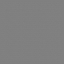

-


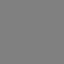

-


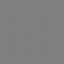

-


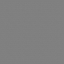

-


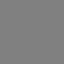

-


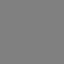

-


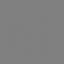

-


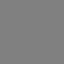

-


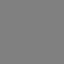

-


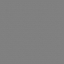

-


In [8]:
#exibe a saída com as 10 imagens
from PIL import Image

for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    print("-")

#### WGAN

In [9]:
#para o wgan, vamos criar uma versão diferente do discriminador 

import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def critic(x, is_training=True, reuse_variables=True): #nova versão do discriminador - critic
    with tf.variable_scope('critic', reuse=reuse_variables):
        conv_0 = Conv2D(filters=128, #iniciando de 128 filtros
                                  kernel_size=(4, 4), #com kernel 4x4
                                  strides=(2, 2), # e stride 2x2
                                  padding='same')(x)# e same padding 
                                 
        conv_1 = Conv2D(filters=256,  #aumentamos gradualmente os filtros para 256
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(conv_0)) # same padding e função de ativação leaky relu
        
        b_conv_1 = BatchNormalization()(conv_1, training=is_training) # normalização para evitar overfitting durante o treinamento
        
        conv_2 = Conv2D(filters=512, 
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_1))
        
        b_conv_2 = BatchNormalization()(conv_2, training=is_training) # normalização para evitar overfitting durante o treinamento
        
        conv_3 = Conv2D(filters=1024,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_2))
        
        b_conv_3 = BatchNormalization()(conv_3, training=is_training) # normalização para evitar overfitting durante o treinamento
        
        conv_4 = Conv2D(filters=1, # filtro final para saída 
                                  kernel_size=(4, 4),
                                  padding='valid')(tf.nn.leaky_relu(b_conv_3))
        
        return conv_4 # saída do critico é em função da imagem ser verdadeira ou falsa

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph() # define um grafo em branco


with graph.as_default():
    input_x = tf.placeholder(tf.float32, shape=(None, width, height, 1)) #entrada da imagem p/ o discriminador
    input_z = tf.placeholder(tf.float32, shape=(None, code_length)) # define a entrada aleatória p/ o gerador
    is_training = tf.placeholder(tf.bool) # define a variável para distinguir entre treinamento e validação
    
    gen = generator(z=tf.reshape(input_z, (-1, 1, 1, code_length)), is_training=is_training) # define a rede geradora
    
    r_input_x = tf.image.resize_images(images=input_x, size=(64, 64)) #reduz a imagem para uma imagem de 64x64
        
    crit_1_l = critic(x=r_input_x, is_training=is_training, reuse_variables=False) # verifica a resposta real
    crit_2_l = critic(x=gen, is_training=is_training, reuse_variables=True) # verifica a imagem gerada
    
    #calcula o erro dos discriminadores
    loss_c = tf.reduce_mean(crit_2_l - crit_1_l)
    loss_g = tf.reduce_mean(-crit_2_l) 
    
    # define as variáveis usadas pelo gerador e pelo discriminador    
    variables_g = [variable for variable in tf.trainable_variables() if variable.name.startswith('generator')]
    variables_c = [variable for variable in tf.trainable_variables() if variable.name.startswith('critic')]
    
    #realiza o passo de treinamento de ambas as redes
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer_c = tf.train.AdamOptimizer(0.00005, beta1=0.5, beta2=0.9).minimize(loss=loss_c, var_list=variables_c)
        
        with tf.control_dependencies([optimizer_c]):
            training_step_c = tf.tuple(tensors=[tf.assign(variable, tf.clip_by_value(variable, -0.01, 0.01)) 
                                                for variable in variables_c])
        
        training_step_g = tf.train.AdamOptimizer(0.00005, beta1=0.5, beta2=0.9).minimize(loss=loss_g, var_list=variables_g)


In [13]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

nb_epochs = 200 # para 200 epocas
nb_critic = 5 # vamos usar 5 críticos
batch_size = 64 # com o batch de 64
nb_iterations = int(nb_samples / batch_size)

session = tf.InteractiveSession(graph=graph) #criamos a sessão para o treinamento
tf.global_variables_initializer().run() # e inicializamos as variáveis

samples_range = np.arange(nb_samples) # p/ o número de amostras - no exemplo inicial 5000

#na DCGAN, definimos um discriminador e usamos ele 5 vezes
#aqui, temos 5 críticos e, por isto, vamos fazer cada um dos 5 uma única vez
for e in range(nb_epochs):
    c_losses = []
    g_losses = []
    
    for i in range(nb_iterations):  # a cada época, verificar as iterações das amostras
        for j in range(nb_critic):  # uma vez para cada uma das redes de críticos
            print(i,"/",nb_iterations, "-",j,"/", nb_critic)

            Xi = np.random.choice(samples_range, size=batch_size) # sorteia a imagem da base
            X = np.expand_dims(X_train[Xi], axis=3) #seleciona a imagem real
            Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32) #gera o valor aleatório para o gerador
            
            #na primeira etapa, vamos treinar a rede crítica
            _, c_loss = session.run([training_step_c, loss_c], # calcula a iteração de treinamento das redes
                                    feed_dict={
                                        input_x: X, # passando o valor real p/ discriminador
                                        input_z: Z, # e o valor aleatório p/ rede geradora e, consequentemente, a discriminadora
                                        is_training: True # definindo que é um treino
                                    })
            c_losses.append(c_loss) #anota a perda em função da rede crítica
        
        #agora vamos treinar a rede geradora
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32) #gera o valor aleatório para o gerador
        
        _, g_loss = session.run([training_step_g, loss_g],  # calcula a iteração de treinamento das redes
                                feed_dict={
                                    input_x: np.zeros(shape=(batch_size, width, height, 1)), # passando o valor zerado p/ o crítico
                                    input_z: Z, # e o valor aleatório p/ rede geradora e, consequentemente, a rede crítica
                                    is_training: True # definindo que é um treino
                                })
        
        g_losses.append(g_loss) #anota a perda em função da rede geradora
        
    print('Epoch {}) Avg. critic loss: {} - Avg. generator loss: {}'.format(e + 1, np.mean(c_losses), np.mean(g_losses)))


0 / 78 0 / 5
0 / 78 1 / 5
0 / 78 2 / 5


KeyboardInterrupt: 

In [14]:
Z = np.random.uniform(-1.0, 1.0, size=(50, code_length)).astype(np.float32) # gera aleatoriamente 50 imagens de ruído branco

Ys = session.run([gen],  # executa a rede para o dataset Z
                 feed_dict={
                     input_z: Z,
                     is_training: False
                })

Ys = np.squeeze((Ys[0] + 1.0) * 0.5 * 255.0).astype(np.uint8) #transforma as saídas da rede em imagens (muda escala de 0-1 para 0-255)


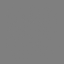

-


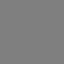

-


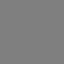

-


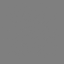

-


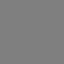

-


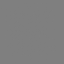

-


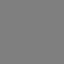

-


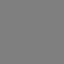

-


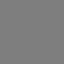

-


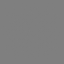

-


In [15]:
#exibe a saída com as 10 imagens 
from PIL import Image

for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    print("-")